<figure>
  <IMG SRC="img/logo.png" WIDTH=100 ALIGN="right">
</figure>

# Lab 4 : Convolution and filtering
*Signal Processing in Geosciences / J. Vergne / Feb 2020* 

---------

In this lab we'll see in practice :
* the convolution of 2 functions
* the fact that convolving a function by a window function is equivalent to a low pass filter
* how to perform numerical filtering of data with a butterworth filter

In [1]:
import numpy as np
from scipy import signal
from numpy import fft
import matplotlib.pyplot as plt
% matplotlib inline

*NB : All the main functions to perform signal processing (like filtering) are available in the `scipy.signal` module*

# 1. Convolution of two vectors

The following code allows you to play with the convolution of 2 vectors (functions) : $f$ and $g$.

In python the convolution of two vectors can be performed with `np.convolve`. 

Have a look to the help (with the `?` character) of this function to see how it works and the various options.

> Then do :
* Define 2 vectors $f$ and $g$
* Do their convolution product and save the result in a vector $h$
* Represent functions $f$, $g$ and $h$
* Use a window function for $g$ and see how it modify $f$


[ 0  4 10 15 14  9 13  6  7  0  2]


Text(0.5,0,'time / index')

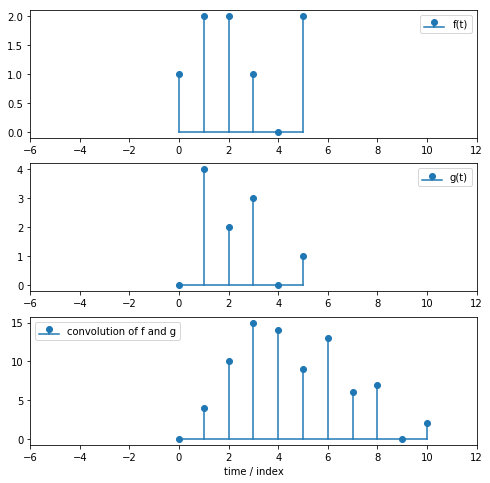

In [2]:
f = np.array([1,2,2,1,0,2])
g = np.array([0,4,2,3,0,1])
#g = np.array([0,0,1,0,0,0])


N = len(f)
t = np.arange(0,N)
h = np.convolve(f,g)
t_conv = np.arange(0,len(h))
print(h)

plt.figure(figsize=(8,8))
plt.subplot(311)
plt.stem(t,f,basefmt='',label='f(t)')
plt.xlim(-N,N*2)
plt.legend()
plt.subplot(312)
plt.stem(t,g,basefmt='',label='g(t)')
plt.xlim(-N,N*2)
plt.legend()
plt.subplot(313)
plt.stem(t_conv,h,basefmt='',label='convolution of f and g')
plt.xlim(-N,N*2)
plt.legend()
plt.xlabel('time / index')

# 2. Filtering data

## 2.1 Analysis of a seismogram

The file `mayotte_1hour.txt` contains 1 hour of raw seismic signal recorded by a seismometer on the island of Mayotte.
It is a text file but with few *meta-data* information at the beginning including the time step.

> To do :
* Import this timeseries with `np.loadtxt` using the `skiprows` option of this function
* Plot the timeseries
* Compute it's Fourier transform and plot the amplitude spectrum (with a log x-axis using `plt.semilogx`)
* Make a quick analysis of this spectrogram

In [10]:
sismo = np.loadtxt('Data/mayotte_1hour.txt',skiprows=8)
sismo = sismo-np.mean(sismo)

Text(0.5,0,'frequency (Hz)')

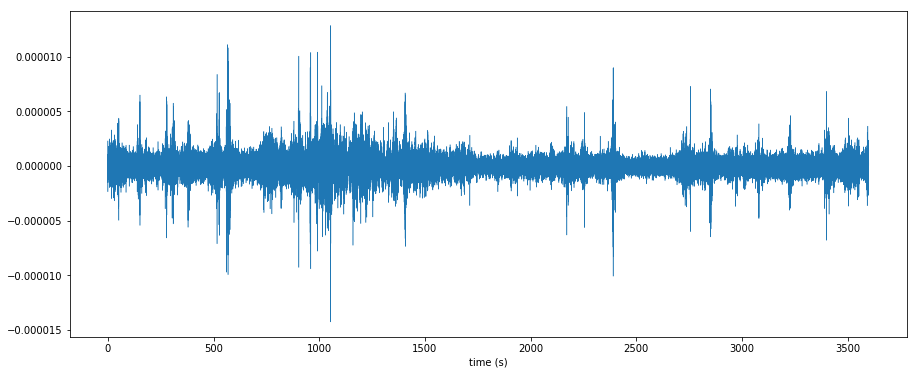

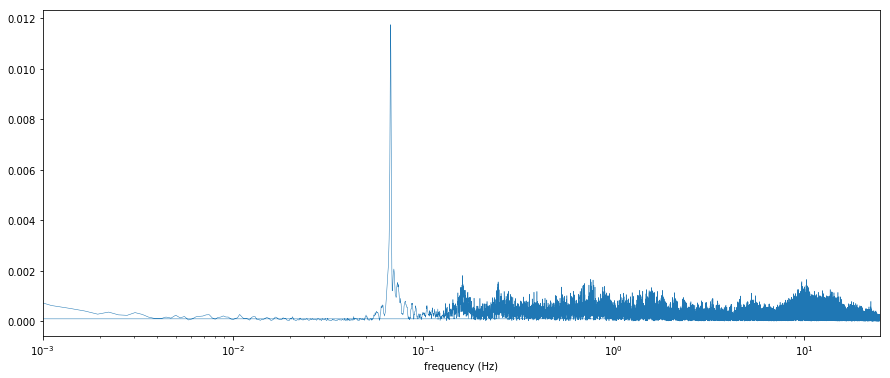

In [12]:
dt = 0.02 # The time step (indicated in the data file)
N = len(sismo) # Number of points
t = np.arange(0,N)*dt # The time vector/sequence

plt.figure(figsize=(15,6))
plt.plot(t,sismo,linewidth=0.5)
plt.xlabel('time (s)')

S = fft.fft(s) # The Fourier transform
f = fft.fftfreq(N,dt) # The corresponding frequency vector
plt.figure(figsize=(15,6))
plt.semilogx(f,np.abs(S),linewidth=0.5)
plt.xlim((0.001,1./(2*dt)))
plt.xlabel('frequency (Hz)')


## 2.2 A homemade low pass filter

We will see know that the convolution of this dataseries with a window function allows to make a simple low-pass filtering.

We want to remove the high frequencies that are higher than the major peak seen in the amplitude spectrum of the raw data.

> To do :
* Define what should be the width of the window function to use for this low-pass filtering
* Create the $g$ vector for the window function. It has to be the same length as the timeseries
* Do the convolution of the timeseries with this window function and plot the result


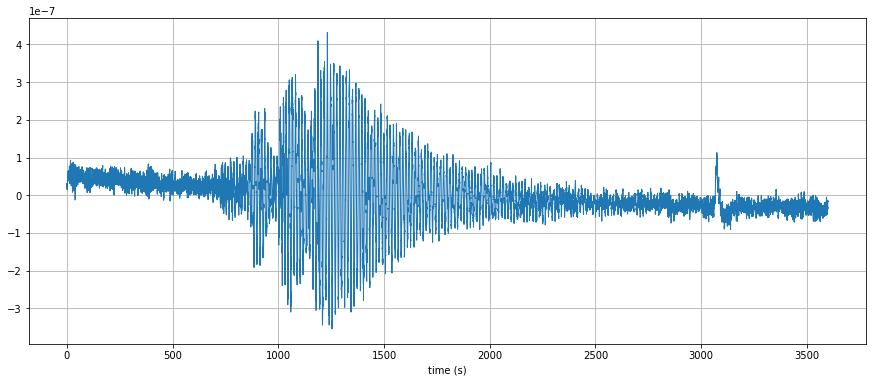

In [14]:
g = np.ones(500) # A vector/sequence of 500 elements all equal to 1 => A 10s long window function
g = g / len(g) # Normalisation (not mandatory)

h = np.convolve(sismo,g,mode='same') # convolution

plt.figure(figsize=(15,6))
plt.plot(t,h,linewidth=1) # plot of the seismogram convolved by a window of 10s long
plt.xlabel('time (s)')
plt.grid()

## 2.3 Applying a butterworth filter

We will now one of the most popular filter in signal processing : The butterworth filter.

It requires to use 2 functions : 
* `signal.butter` to compute the $b$ and $a$ parameters (coefficients of the polynomial in $i \omega$ for the numerator and denominator) of the desired filter
* `signal.lfilter` to apply this filter to the dataseries (in the time domain)

First have a look to the help of the `signal.butter` and `signal.lfilter` functions. 

> To do :
* Create the $b$ and $a$ vector for a low-pass filter at $0.1Hz$ (and order $2$) to be applied do your timeseries
* Use the function `signal.freqz` to plot the amplitude and phase spectrum of this filter
* Apply this filter to your timeseries with `signal.lfilter`

Text(0.5,0,'time (s)')

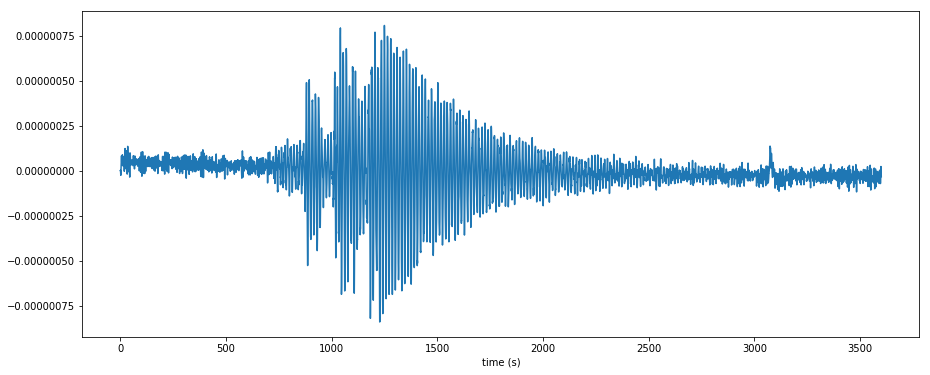

In [15]:
# Creating the filter
order=2
cutoff_freq = 0.1 # cut-off frequency of the low-pass filter in Hz
nyquist_frequency = 1/(2*dt) # Nyquist frequency = sampling frequency / 2

b, a = signal.butter(order,cutoff_freq/nyquist_frequency,btype='low')

# Filter data
sismo_filtered = signal.lfilter(b,a,sismo)

# Plot filtered data
plt.figure(figsize=(15,6))
plt.plot(t,sismo_filtered)
plt.xlabel('time (s)')

We now want to apply a bandpass filter between $1Hz$ and $3Hz$

> To do :
* Define your $a$ and $b$ coefficient for this new filter
* Apply it to your timeseries

Text(0.5,0,'time (s)')

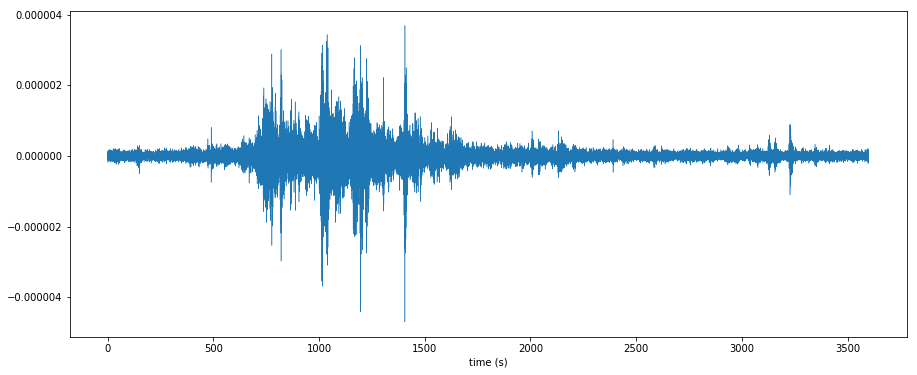

In [17]:
fmin = 1
fmax = 3
b,a = signal.butter(2,[fmin/nyquist_frequency,fmax/nyquist_frequency],btype="bandpass")
sismo_filtered = signal.lfilter(b, a, sismo)

plt.figure(figsize=(15,6))
plt.plot(t,sismo_filtered,linewidth=0.5)
plt.xlabel('time (s)')